<h1>Gradio Pets</h1>

Trained on Kaggle

In [2]:
from fastai.vision.all import *
import timm

In [4]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=RegexLabeller(pat = r'^([^/]+)_\d+'),
    item_tfms=Resize(224))

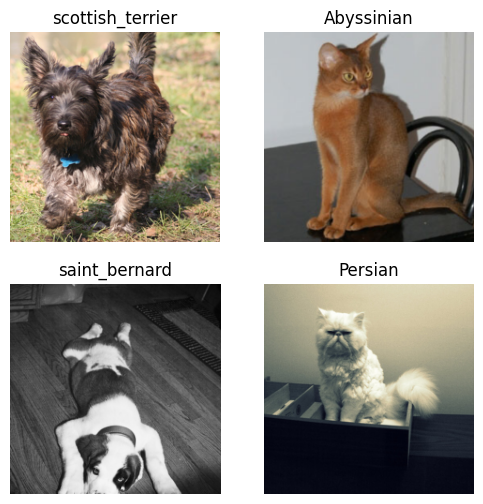

In [6]:
dls.show_batch(max_n=4)

In [7]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 188MB/s] 


Lets use a better model, based on https://www.kaggle.com/code/jhoward/which-image-models-are-best/.

The convnext models seems to be good. We can access these models through timm.

In [11]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_atto_rms',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnext_zepto_rms',
 'convnext_zepto_rms_ols',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [7]:
import torch

learn = vision_learner(dls, 'convnextv2_tiny', metrics=error_rate)

# If more than one GPU is available, wrap the model with DataParallel
if torch.cuda.device_count() > 1:
    print(f"Using {torch.cuda.device_count()} GPUs")
    learn.model = torch.nn.DataParallel(learn.model)

learn.fine_tune(3)

Using 2 GPUs


Wow! The better model has produced a lower error_rate!

In [9]:
# Because we wrapped the model in a PyTorch DataParallel object, we need to "unwrap" it to get the standard model. The fastai operations (export) support the standard model.
if hasattr(learn.model, 'module'):
    learn.model = learn.model.module

learn.export('model.pkl')